In [2]:
from skimage import io as io
from fit_and_classify import *
%matplotlib inline

In [3]:
image = io.imread('public_data/00_input/train/11001.png')

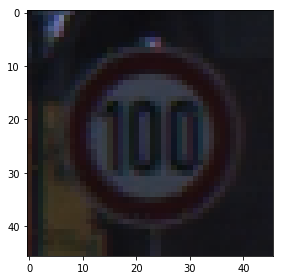

In [4]:
io.imshow(image)

In [5]:
f = extract_hog(image)

In [8]:
np.shape(image)

(46, 46, 3)

In [ ]:
len(f[0])

In [9]:
46*42*3

5796

In [7]:
f

array([ 0.26425179,  0.19439193,  0.05854791,  0.20116162,  0.41437364,
        0.10915299,  0.00854961,  0.02388132,  0.04041635,  0.00925211,
        0.26874499,  0.01576876,  0.15285421,  0.03672975,  0.10489516,
        0.0508359 ,  0.27866471,  0.0016277 ,  0.17716087,  0.03574576,
        0.13365212,  0.12787058,  0.07408088,  0.0181275 ,  0.3515032 ,
        0.12862806,  0.21815567,  0.40128978,  0.13519688,  0.1069062 ,
        0.12397597,  0.08706459,  0.26947518,  0.00157403,  0.17131863,
        0.03456697,  0.12924467,  0.12365379,  0.07163791,  0.01752971,
        0.33991167,  0.12438629,  0.21096155,  0.38805644,  0.13073849,
        0.10338075,  0.11988761,  0.08419346,  0.12859201,  0.14825792,
        0.09902522,  0.28046963,  0.02741265,  0.0220474 ,  0.03221991,
        0.0692218 ,  0.12013112,  0.4276462 ,  0.02207488,  0.30805741,
        0.09392125,  0.15609847,  0.14996557,  0.04032267,  0.14782699,
        0.17043454,  0.11383755,  0.32242267,  0.03151308,  0.02